In [18]:
## Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [19]:

## Loading house data for the last 319,558 purchase transcations from  01-01-2017 to 31-02-2023  in London.
#Data source: https://landregistry.data.gov.uk/app/ppd/
#Details on columns: https://www.gov.uk/guidance/about-the-price-paid-data
houses = pd.read_csv("C:/Users/chizu/OneDrive/Desktop/Bootcamp/more data + altered_Final_project/ppd_data_more.csv")

In [20]:
#Checking the first 5 rows of data.
houses.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,...,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,Unnamed: 25,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/transaction/8355F008-E750-55C5-E053-6B04A8C0D090/current
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,2019-05-24,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,2020-08-13,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,2018-12-06,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79A74E21-6CCB-1289-E053-6B04A8C01627,430500,2018-10-18,E1 0AE,F,N,L,NaN,316,CABLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D22473F5-2C16-7B40-E053-6C04A8C0A630,420000,2021-06-25,E1 0AE,F,N,L,NaN,330,CABLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Checking the last 5 rows of data.
houses.tail()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,...,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,Unnamed: 25,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/transaction/8355F008-E750-55C5-E053-6B04A8C0D090/current
319554,DE2D0CE0-98A2-51EE-E053-6C04A8C00671,320000,2021-11-19,NaN,O,N,F,NaN,GARAGE 21,WANDLE ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319555,75050A86-229E-9A88-E053-6B04A8C02390,9000000,2018-08-10,NaN,O,N,F,NaN,1,WERTER ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319556,BA558B33-260F-76EF-E053-6B04A8C0B4B7,500000,2020-10-30,NaN,F,N,L,FLAT 6,19,WIMBLEDON PARK ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319557,B0A9D11B-D4BC-4C1F-E053-6C04A8C0D716,123125,2019-11-29,NaN,F,N,L,PLOT 1357,BLOCK K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319558,DBA933FA-8E18-669D-E053-6B04A8C0AD56,225655,2021-04-20,NaN,O,N,F,BLOCK X,MACMILLAN WAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319559 entries, 0 to 319558
Data columns (total 31 columns):
 #   Column                                                                                             Non-Null Count   Dtype  
---  ------                                                                                             --------------   -----  
 0   unique_id                                                                                          319559 non-null  object 
 1   price_paid                                                                                         319559 non-null  int64  
 2   deed_date                                                                                          319559 non-null  object 
 3   postcode                                                                                           317686 non-null  object 
 4   property_type                                                                                      319559 non-

In [23]:
houses.describe()

,price_paid,233500,2018-11-26,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,Unnamed: 25,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/transaction/8355F008-E750-55C5-E053-6B04A8C0D090/current
count,3.195590e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.010352e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.011732e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.860000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.400000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.250000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.692000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#######################Data Cleaning############################

In [25]:
houses.isnull().sum()

unique_id                                                                                                 0
price_paid                                                                                                0
deed_date                                                                                                 0
postcode                                                                                               1873
property_type                                                                                             0
new_build                                                                                                 0
estate_type                                                                                               0
saon                                                                                                 168658
paon                                                                                                      0
street                      

In [26]:
#Removing useless columns especially the ones with nulls values as I don't need them.
houses.drop(columns='linked_data_uri"8355F008-E750-55C5-E053-6B04A8C0D090"', axis=1, inplace=True)
houses.drop(columns='233500', axis=1, inplace=True)
houses.drop(columns='2018-11-26', axis=1, inplace=True)
houses.drop(columns='F', axis=1, inplace=True)
houses.drop(columns='N', axis=1, inplace=True)
houses.drop(columns='L', axis=1, inplace=True)
houses.drop(columns='FLAT 4', axis=1, inplace=True)
houses.drop(columns='A', axis=1, inplace=True)
houses.drop(columns='http://landregistry.data.gov.uk/data/ppi/transaction/8355F008-E750-55C5-E053-6B04A8C0D090/current', axis=1, inplace=True)
houses.drop(columns='E1 0AD', axis=1, inplace=True)
houses.drop(columns='BILL FAUST HOUSE, 20', axis=1, inplace=True)
houses.drop(columns='TARLING STREET', axis=1, inplace=True)
houses.drop(columns='Unnamed: 25', axis=1, inplace=True)
houses.drop(columns='TOWER HAMLETS', axis=1, inplace=True)
houses.drop(columns='postcode', axis=1, inplace=True)
houses.drop(columns='saon', axis=1, inplace=True)
houses.drop(columns='locality', axis=1, inplace=True)
houses.drop(columns='LONDON', axis=1, inplace=True)
houses.drop(columns='GREATER LONDON', axis=1, inplace=True)
houses.drop(columns='street', axis=1, inplace=True)
houses.drop(columns='unique_id', axis=1, inplace=True)

In [27]:
#Checking the first 5 columns.
houses.head()

,price_paid,deed_date,property_type,new_build,estate_type,paon,town,district,county,transaction_category
0,140000,2019-05-24,F,N,L,"BILL FAUST HOUSE, 20",LONDON,TOWER HAMLETS,GREATER LONDON,A
1,325000,2020-08-13,F,N,L,"BILL FAUST HOUSE, 20",LONDON,TOWER HAMLETS,GREATER LONDON,A
2,176000,2018-12-06,F,N,L,"ADAM MEERE HOUSE, 24",LONDON,TOWER HAMLETS,GREATER LONDON,A
3,430500,2018-10-18,F,N,L,316,LONDON,TOWER HAMLETS,GREATER LONDON,A
4,420000,2021-06-25,F,N,L,330,LONDON,TOWER HAMLETS,GREATER LONDON,A


In [28]:
#Checking the last 5 columns.
houses.tail()

,price_paid,deed_date,property_type,new_build,estate_type,paon,town,district,county,transaction_category
319554,320000,2021-11-19,O,N,F,GARAGE 21,LONDON,WANDSWORTH,GREATER LONDON,B
319555,9000000,2018-08-10,O,N,F,1,LONDON,WANDSWORTH,GREATER LONDON,B
319556,500000,2020-10-30,F,N,L,19,LONDON,WANDSWORTH,GREATER LONDON,A
319557,123125,2019-11-29,F,N,L,BLOCK K,LONDON,WANDSWORTH,GREATER LONDON,A
319558,225655,2021-04-20,O,N,F,MACMILLAN WAY,LONDON,WANDSWORTH,GREATER LONDON,B


In [29]:
#Checking the data type.
houses["deed_date"]

0         2019-05-24
1         2020-08-13
2         2018-12-06
3         2018-10-18
4         2021-06-25
             ...    
319554    2021-11-19
319555    2018-08-10
319556    2020-10-30
319557    2019-11-29
319558    2021-04-20
Name: deed_date, Length: 319559, dtype: object

In [30]:
#Changing the data type to datetime
houses["deed_date"] = pd.to_datetime(houses["deed_date"])
houses["deed_date"]

0        2019-05-24
1        2020-08-13
2        2018-12-06
3        2018-10-18
4        2021-06-25
            ...    
319554   2021-11-19
319555   2018-08-10
319556   2020-10-30
319557   2019-11-29
319558   2021-04-20
Name: deed_date, Length: 319559, dtype: datetime64[ns]

In [31]:
#Extracting the year from deed_date. The same steps can be done to extract month and day but I think i'll just use the year.
houses["deed_date"].dt.year

0         2019
1         2020
2         2018
3         2018
4         2021
          ... 
319554    2021
319555    2018
319556    2020
319557    2019
319558    2021
Name: deed_date, Length: 319559, dtype: int64

In [32]:
houses = houses.assign(year = houses["deed_date"].dt.year)
houses = houses.assign(month = houses["deed_date"].dt.month)
houses.head()

,price_paid,deed_date,property_type,new_build,estate_type,paon,town,district,county,transaction_category,year,month
0,140000,2019-05-24,F,N,L,"BILL FAUST HOUSE, 20",LONDON,TOWER HAMLETS,GREATER LONDON,A,2019,5
1,325000,2020-08-13,F,N,L,"BILL FAUST HOUSE, 20",LONDON,TOWER HAMLETS,GREATER LONDON,A,2020,8
2,176000,2018-12-06,F,N,L,"ADAM MEERE HOUSE, 24",LONDON,TOWER HAMLETS,GREATER LONDON,A,2018,12
3,430500,2018-10-18,F,N,L,316,LONDON,TOWER HAMLETS,GREATER LONDON,A,2018,10
4,420000,2021-06-25,F,N,L,330,LONDON,TOWER HAMLETS,GREATER LONDON,A,2021,6


In [33]:
#Columns sorted by deed_date.
houses.sort_values("deed_date")

,price_paid,deed_date,property_type,new_build,estate_type,paon,town,district,county,transaction_category,year,month
190309,7500000,2017-12-31,D,N,F,34,LONDON,LEWISHAM,GREATER LONDON,B,2017,12
189720,10889774,2017-12-31,O,N,F,1,LONDON,BROMLEY,GREATER LONDON,B,2017,12
173431,475000,2017-12-31,F,N,L,KNOLL COURT,LONDON,SOUTHWARK,GREATER LONDON,B,2017,12
287088,1465707,2017-12-31,O,N,F,25,LONDON,EALING,GREATER LONDON,B,2017,12
85961,273000,2018-01-01,O,N,F,UNIT 10,LONDON,HARINGEY,GREATER LONDON,B,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...
264492,4750000,2023-01-20,F,N,L,10 - 14,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,2023,1
104538,475000,2023-01-20,F,N,L,8C,LONDON,CAMDEN,GREATER LONDON,A,2023,1
6845,467000,2023-01-20,F,N,L,39,LONDON,WALTHAM FOREST,GREATER LONDON,A,2023,1
34335,395000,2023-01-23,F,N,L,5,LONDON,WALTHAM FOREST,GREATER LONDON,A,2023,1


In [34]:
houses_sorted = houses.sort_values("deed_date")
houses_sorted.head()

,price_paid,deed_date,property_type,new_build,estate_type,paon,town,district,county,transaction_category,year,month
190309,7500000,2017-12-31,D,N,F,34,LONDON,LEWISHAM,GREATER LONDON,B,2017,12
189720,10889774,2017-12-31,O,N,F,1,LONDON,BROMLEY,GREATER LONDON,B,2017,12
173431,475000,2017-12-31,F,N,L,KNOLL COURT,LONDON,SOUTHWARK,GREATER LONDON,B,2017,12
287088,1465707,2017-12-31,O,N,F,25,LONDON,EALING,GREATER LONDON,B,2017,12
85961,273000,2018-01-01,O,N,F,UNIT 10,LONDON,HARINGEY,GREATER LONDON,B,2018,1


In [35]:
houses_sorted['year']

190309    2017
189720    2017
173431    2017
287088    2017
85961     2018
          ... 
264492    2023
104538    2023
6845      2023
34335     2023
317822    2023
Name: year, Length: 319559, dtype: int64

In [36]:
#######################Exploratory Data Analysis#################################################

In [37]:
#Number of districts
print('Number of districts:', houses_sorted['district'].nunique())

Number of districts: 36


In [38]:
#Having a peak at the district column.
print(houses_sorted['district'])

190309                  LEWISHAM
189720                   BROMLEY
173431                 SOUTHWARK
287088                    EALING
85961                   HARINGEY
                   ...          
264492    KENSINGTON AND CHELSEA
104538                    CAMDEN
6845              WALTHAM FOREST
34335             WALTHAM FOREST
317822                    CAMDEN
Name: district, Length: 319559, dtype: object


In [39]:
#Ranking housing district based on sales. The most popular district is Wandsorth with 27415 sales.
houses_sorted['district'].value_counts().to_frame()

,district
WANDSWORTH,27415
LAMBETH,21124
TOWER HAMLETS,21021
GREENWICH,18466
SOUTHWARK,18018
LEWISHAM,17894
BARNET,17435
WALTHAM FOREST,16462
CITY OF WESTMINSTER,15872
NEWHAM,15309


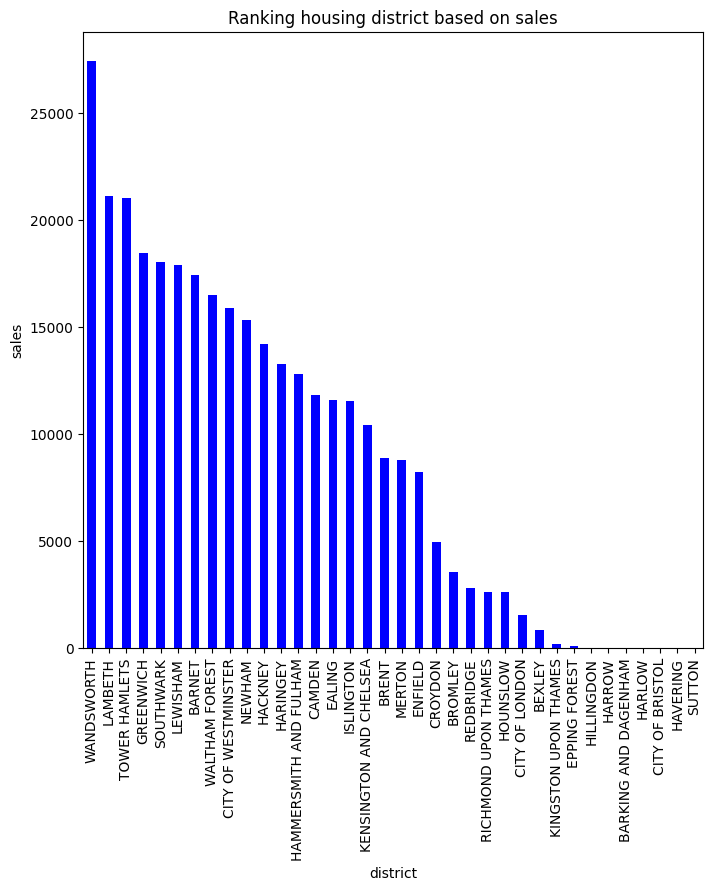

In [42]:
plt.figure(figsize=(8,8))
houses_sorted['district'].value_counts().plot(kind='bar', color = ['blue'])
plt.xlabel('district')
plt.ylabel('sales')
plt.title('Ranking housing district based on sales')
plt.show()

In [43]:
#Average house price per year of purchase.
houses_sorted.groupby('year')['price_paid'].median()

year
2017    4482853.5
2018     505000.0
2019     520000.0
2020     549000.0
2021     555000.0
2022     580000.0
2023     557500.0
Name: price_paid, dtype: float64

In [44]:
#The minimum amount paid for a property in London in 2017 to feb.2023
houses_sorted.groupby('year')['price_paid'].min()

year
2017    475000
2018       100
2019       100
2020       100
2021       100
2022       100
2023      4000
Name: price_paid, dtype: int64

In [45]:
#The maximum amount paid for a property in London between 2017 to 2023.
houses_sorted.groupby('year')['price_paid'].max()

year
2017     10889774
2018    569200000
2019    411500000
2020    400000000
2021    523000000
2022    186000000
2023     14500000
Name: price_paid, dtype: int64

In [46]:
#Analysing the 3 most popular districts from the the dataset.
Wandsworth_df = houses_sorted[houses_sorted['district'] == 'WANDSWORTH'].copy()
Lambeth_df = houses_sorted[houses_sorted['district'] == 'LAMBETH'].copy()
Tower_Hamlets_df = houses_sorted[houses_sorted['district'] == 'TOWER HAMLETS'].copy()

#Concating the 3 districts into one dataset.add
concated_districts_df=pd.concat([Wandsworth_df,Lambeth_df,Tower_Hamlets_df])
concated_districts_df

,price_paid,deed_date,property_type,new_build,estate_type,paon,town,district,county,transaction_category,year,month
241358,153750,2018-01-01,F,N,L,MERIDIAN HOUSE,LONDON,WANDSWORTH,GREATER LONDON,A,2018,1
222996,550000,2018-01-02,F,N,L,106,LONDON,WANDSWORTH,GREATER LONDON,A,2018,1
219729,1540000,2018-01-02,F,Y,L,"SOPHORA HOUSE, 342",LONDON,WANDSWORTH,GREATER LONDON,A,2018,1
221912,3400000,2018-01-02,D,N,F,15,LONDON,WANDSWORTH,GREATER LONDON,A,2018,1
214867,435000,2018-01-02,F,N,L,ORBIS WHARF,LONDON,WANDSWORTH,GREATER LONDON,A,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16547,500000,2022-12-22,F,N,L,"MAHER COURT, 156",LONDON,TOWER HAMLETS,GREATER LONDON,A,2022,12
45672,300000,2023-01-06,F,N,L,"CARRICK COURT, 5",LONDON,TOWER HAMLETS,GREATER LONDON,A,2023,1
1039,355000,2023-01-12,F,N,L,ADDIS HOUSE,LONDON,TOWER HAMLETS,GREATER LONDON,A,2023,1
41256,247600,2023-01-13,F,N,L,SIVILL HOUSE,LONDON,TOWER HAMLETS,GREATER LONDON,A,2023,1


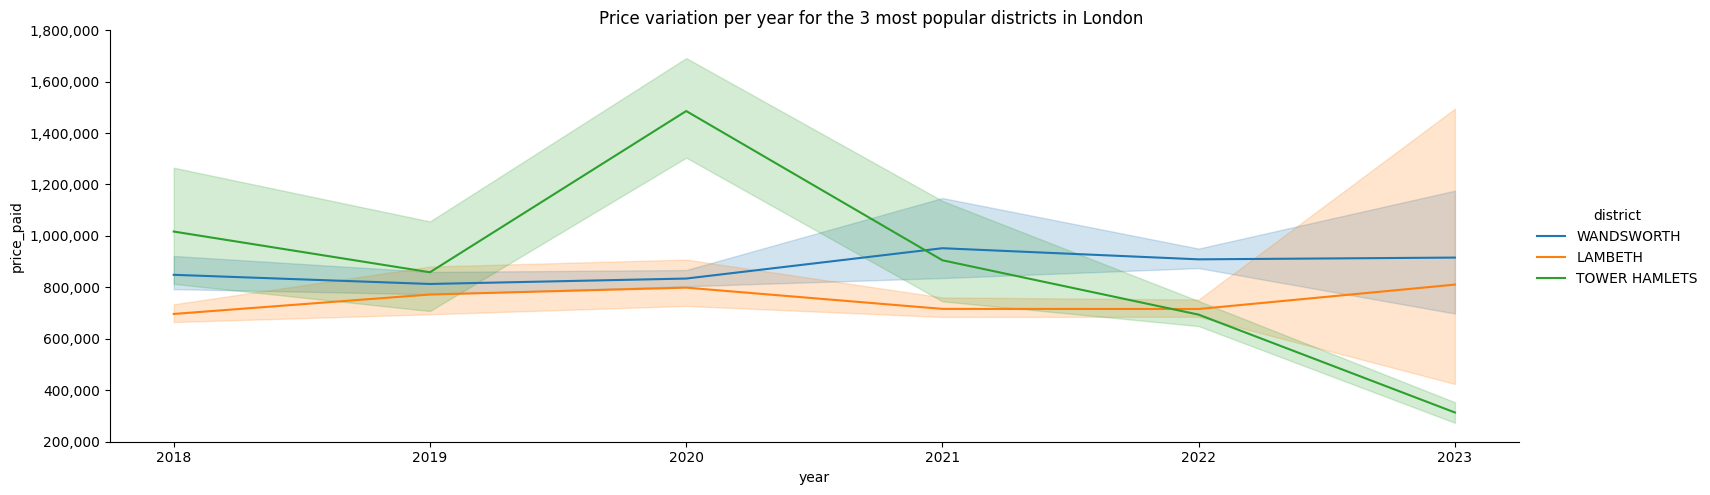

In [47]:
#Price variation per year for the 3 most popular districts in London: Wandsworth, Lambeth and Tower Hamlets.
plot_1 = sns.relplot(kind = 'line', data = concated_districts_df, x = 'year', y = 'price_paid', hue = 'district', aspect = 3, )
plot_1.fig.suptitle('Price variation per year for the 3 most popular districts in London')
plot_1.set_yticklabels(["200,000","400,000","600,000", "800,000", "1,000,000", "1,200,000", "1,400,000", "1,600,000", "1,800,000"])
#Tower Hamlets price drop from 2020 to 2023. Could this be because of COVID? 

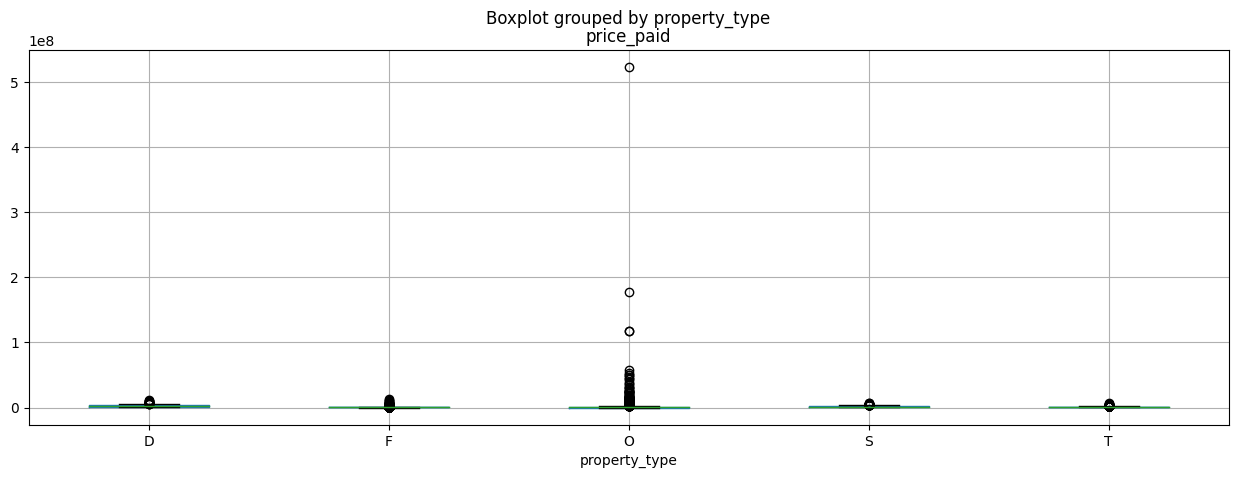

In [48]:
plot_2 = Wandsworth_df.boxplot(column = 'price_paid', by = 'property_type', figsize = (15,5))

#This shows that the majority of the property that is being purchased in Wandsworth are neither detached, semi-detached, terraced or flats/maisonettes. They fall under the 'other' category.

# According to the sources:https://www.gov.uk/guidance/about-the-price-paid-data, ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values, for example where a property comprises more than one large parcel of land.

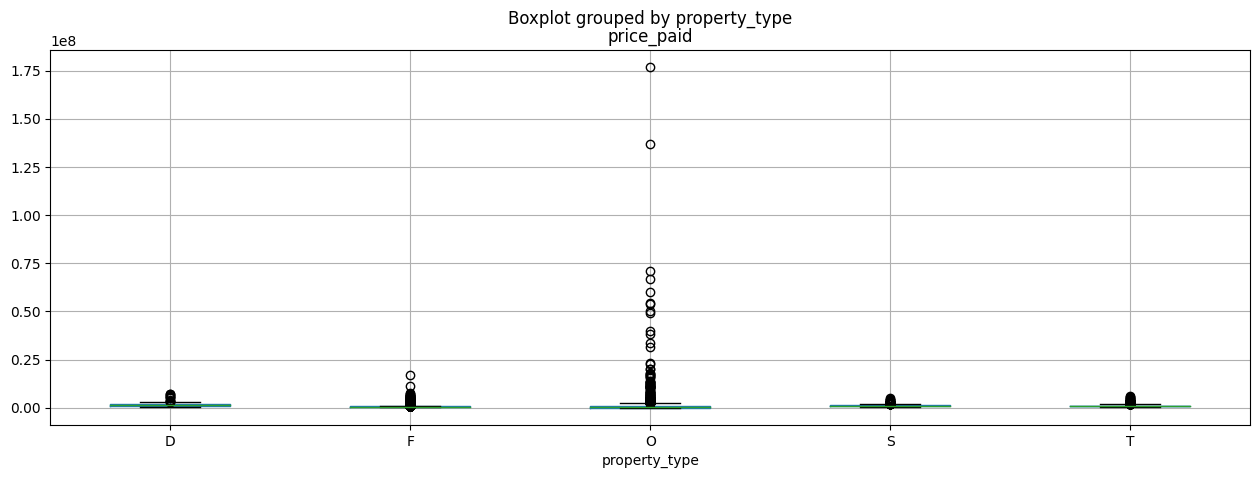

In [49]:
plot_3 = Lambeth_df.boxplot(column = 'price_paid', by = 'property_type', figsize = (15,5))
#Majority of properties being purchased in Lambetha also fall under the 'other' category as well.

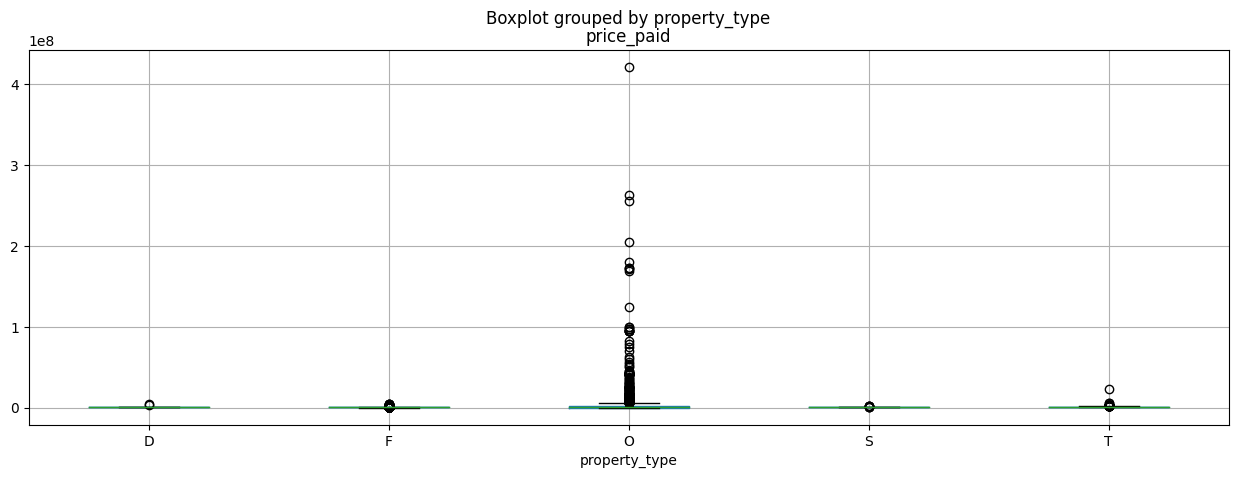

In [50]:
plot_4 = Tower_Hamlets_df.boxplot(column = 'price_paid', by = 'property_type', figsize = (15,5))
#Majority of properties being purchased in Tower Hamlets also fall under the 'other' category.

Text(0.5, 0.98, 'Prices in Wandsworth per year against property type')

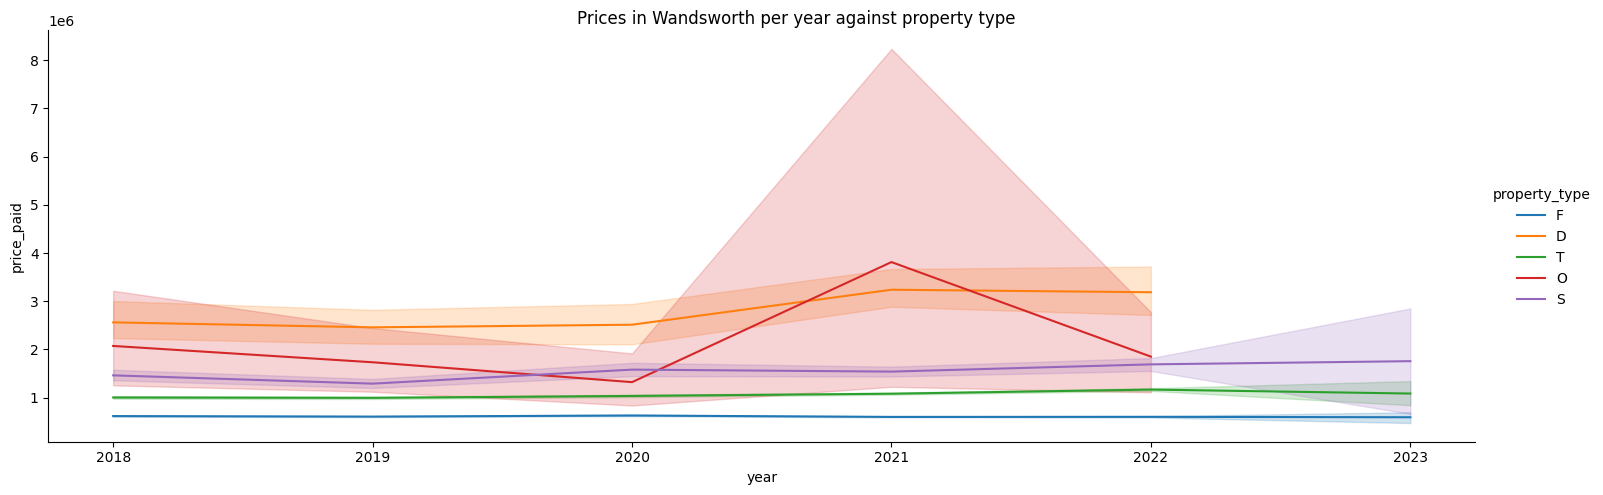

In [51]:
plot_5 = sns.relplot(kind = 'line', data = Wandsworth_df, x = 'year', y = 'price_paid', hue = 'property_type', aspect = 3)
plot_5.fig.suptitle('Prices in Wandsworth per year against property type')
#This shows that Wandworth saw its highest property price rise in in 2021 with the property type called 'other'.

Text(0.5, 0.98, 'Prices in Lambeth per year against property type')

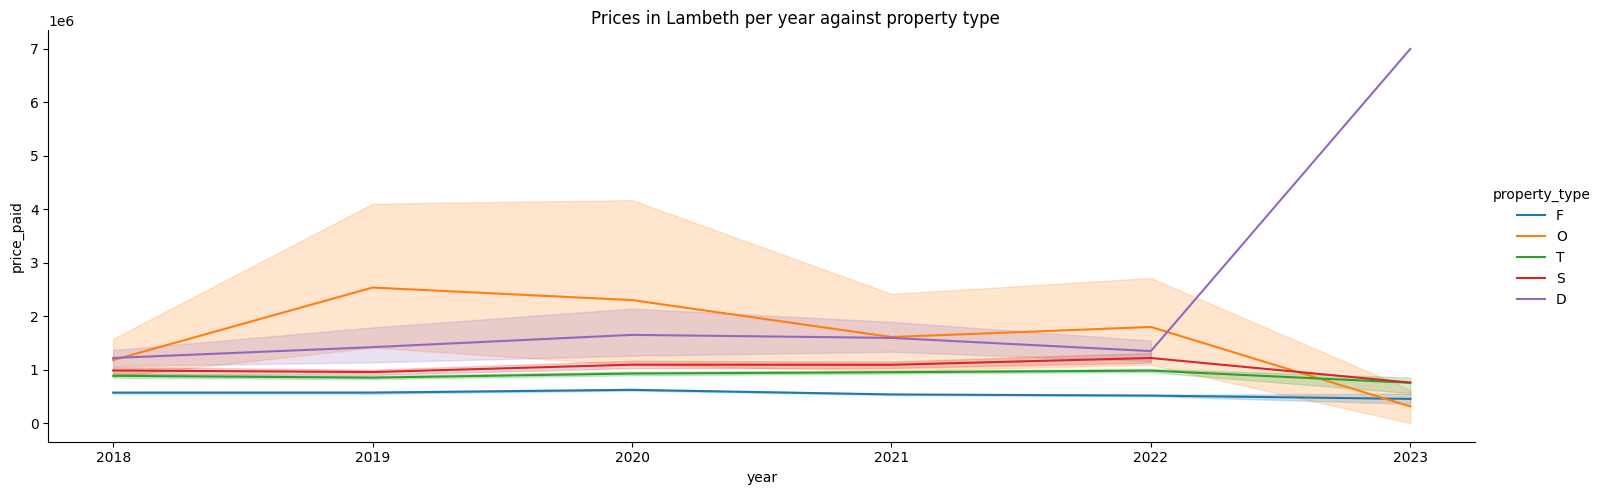

In [52]:
plot_6=sns.relplot(kind = 'line', data = Lambeth_df, x = 'year', y = 'price_paid', hue = 'property_type', aspect = 3)
plot_6.fig.suptitle('Prices in Lambeth per year against property type')
#'Other' properties seems to be the most popular in Lambeth but there appears to be a suprise price rise in detached housing from 2022 onwards.

Text(0.5, 0.98, 'Prices in Tower Hamlet per years against property type')

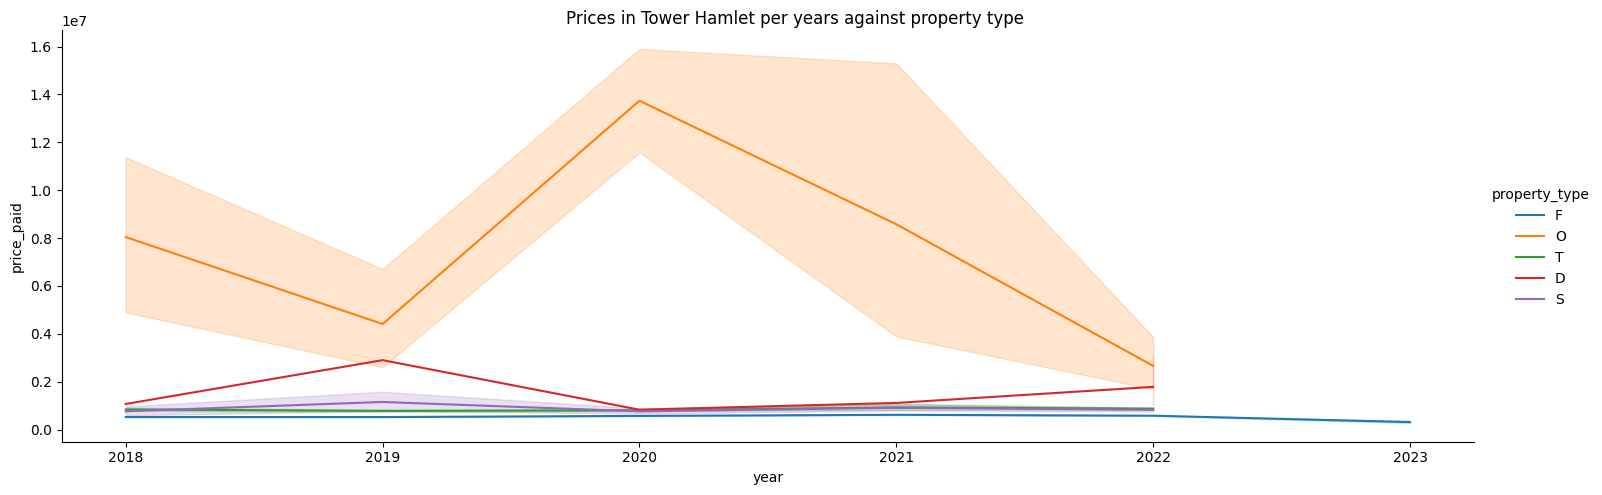

In [53]:
plot_7=sns.relplot(kind = 'line', data = Tower_Hamlets_df, x = 'year', y = 'price_paid', hue = 'property_type', aspect = 3)
plot_7.fig.suptitle('Prices in Tower Hamlet per years against property type')
#'Other' properties also seem to be the most popular in Tower Hamlet with the highest prices paid in 2020 and then a huge drop down to 2022.

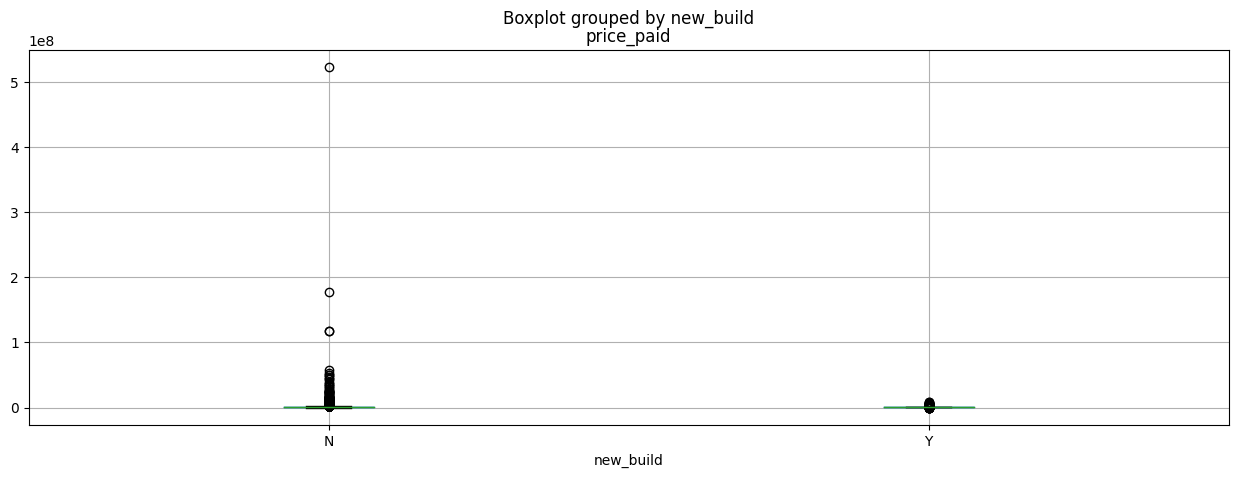

In [54]:
plot_8=Wandsworth_df.boxplot(column = 'price_paid', by = 'new_build', figsize = (15,5))
#Majority of houses that were bought in this area are not new builds.

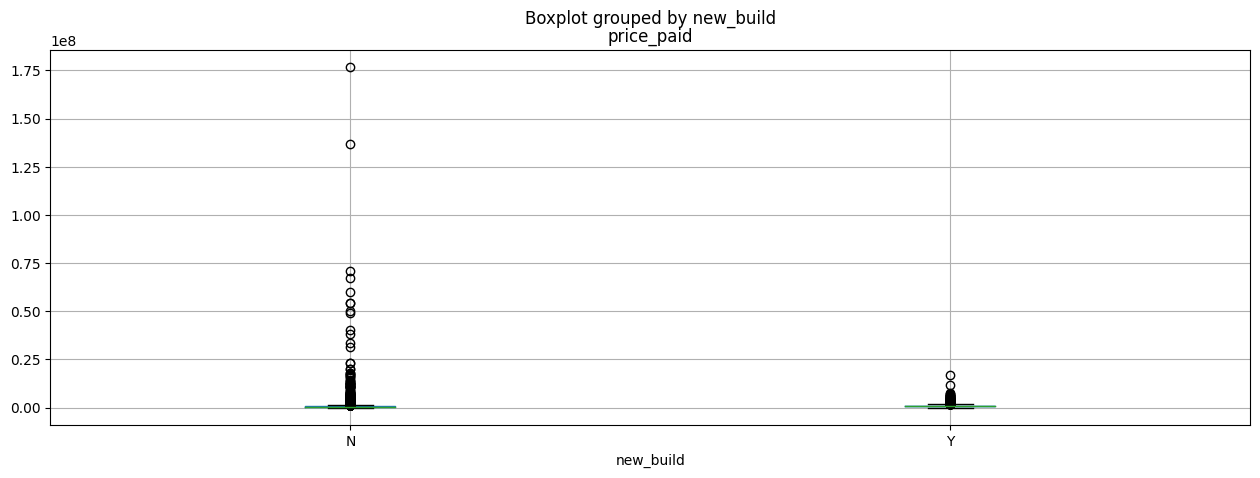

In [55]:
plot_9=Lambeth_df.boxplot(column = 'price_paid', by = 'new_build', figsize = (15,5))
#Majority of houses that were bought in this area are not new builds.

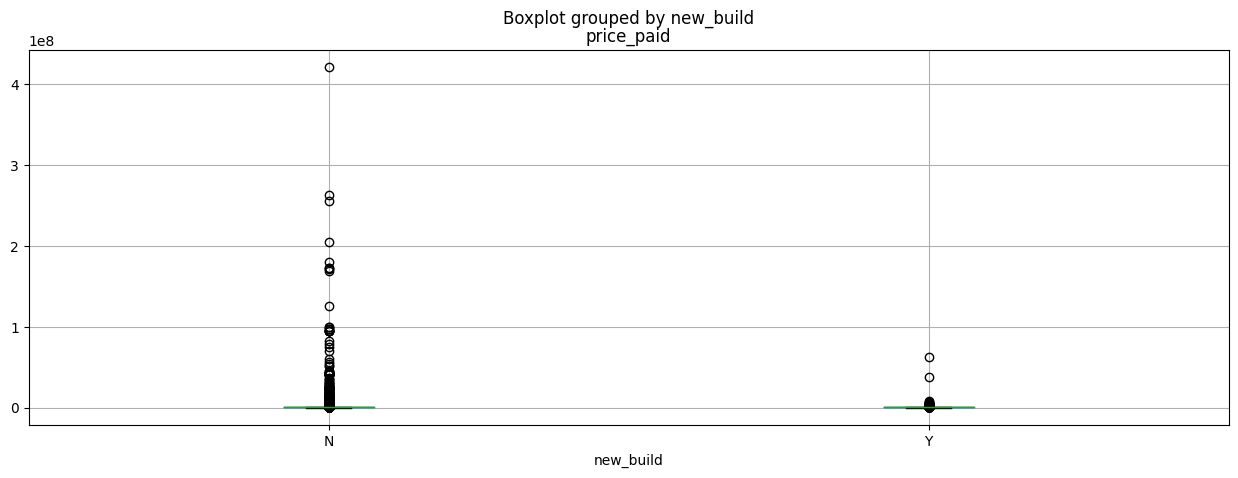

In [56]:
plot_10=Tower_Hamlets_df.boxplot(column = 'price_paid', by = 'new_build', figsize = (15,5))
#Majority of houses that were bought in this area are not new builds.

Text(0.5, 0.98, 'Price paid per year against new_build in Wandsworth')

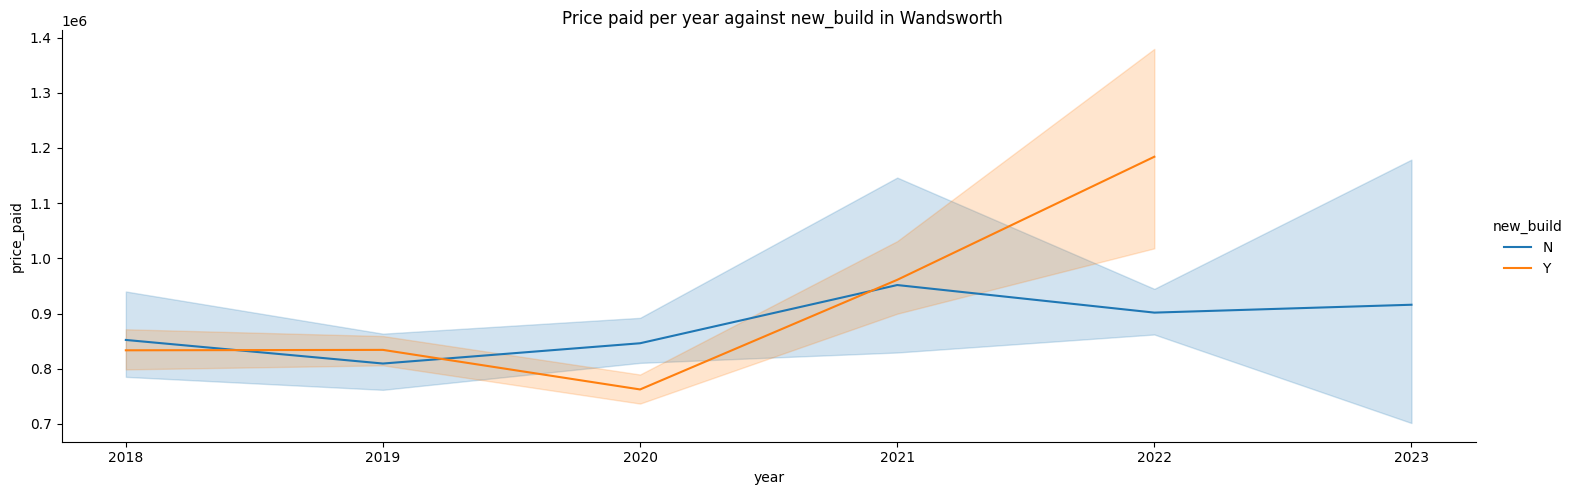

In [57]:
plot_11=sns.relplot(kind = 'line', data = Wandsworth_df, x = 'year', y = 'price_paid', hue = 'new_build', aspect = 3)
plot_11.fig.suptitle('Price paid per year against new_build in Wandsworth')
#New builds went down from the year 2019 to 2020 in Wandsworth but have been rising since then.

Text(0.5, 0.98, 'Price paid per year against new_build in Lambeth')

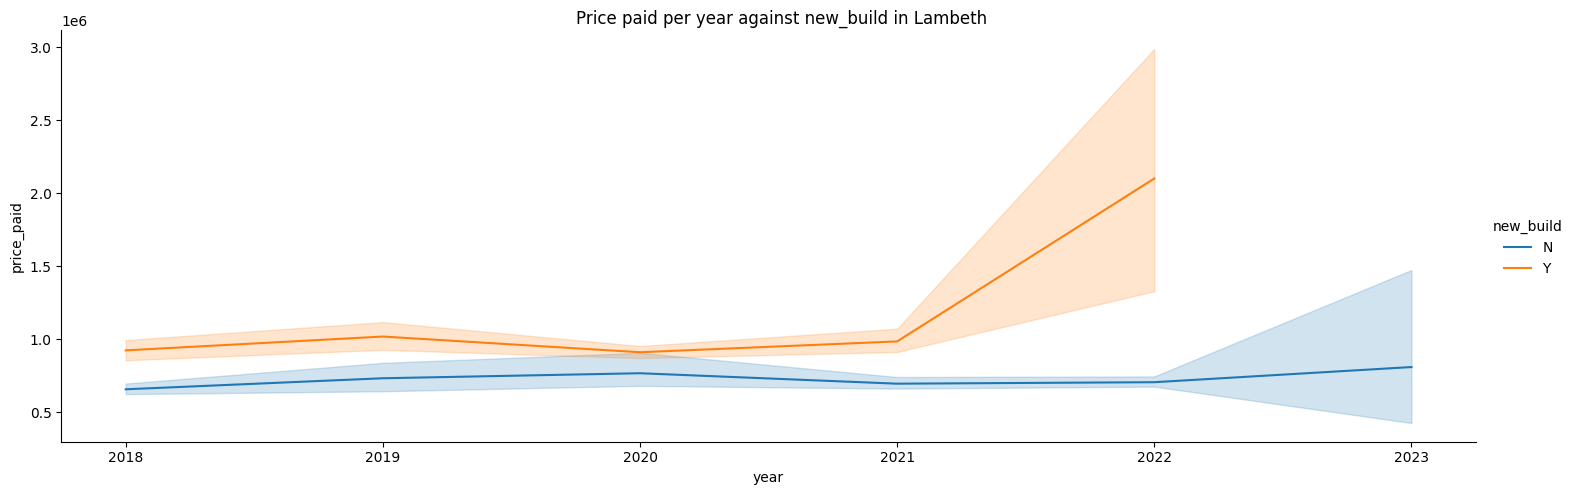

In [58]:
plot_12=sns.relplot(kind = 'line', data = Lambeth_df, x = 'year', y = 'price_paid', hue = 'new_build', aspect = 3)
plot_12.fig.suptitle('Price paid per year against new_build in Lambeth')
#New builds have been low from 2019 to 2021 but have sharply risen since then in Lambeth.

Text(0.5, 0.98, 'Price paid per year against new_build in Tower Hamlet')

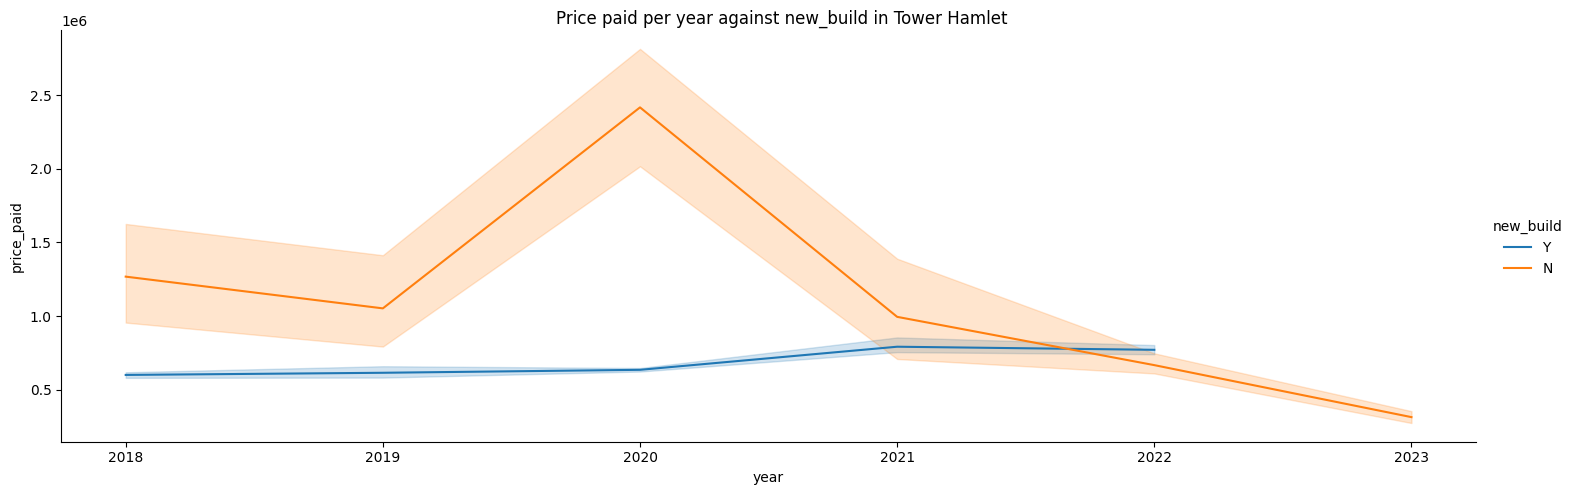

In [59]:
plot_13=sns.relplot(kind = 'line', data = Tower_Hamlets_df, x = 'year', y = 'price_paid', hue = 'new_build', aspect = 3 )
plot_13.fig.suptitle('Price paid per year against new_build in Tower Hamlet')
#New builds in Tower Hamlets have been slowly rising since 2020.

In [60]:
#Price Prediction

#Preparing data for Linear Regression
#Encoding data
houses_sorted['property_type']=	houses_sorted['property_type'].factorize()[0].astype('float64')
houses_sorted['new_build']=	houses_sorted['new_build'].factorize()[0].astype('float64')
houses_sorted['estate_type']=houses_sorted['estate_type'].factorize()[0].astype('float64')
houses_sorted['paon']=houses_sorted['paon'].factorize()[0].astype('float64')
houses_sorted['town']=houses_sorted['town'].factorize()[0].astype('float64')
houses_sorted['district']=houses_sorted['district'].factorize()[0].astype('float64')
houses_sorted['county']=houses_sorted['county'].factorize()[0].astype('float64')
houses_sorted['transaction_category']=houses_sorted['transaction_category'].factorize()[0].astype('float64')

#dropping
houses_sorted.drop(columns='deed_date', axis=1, inplace=True)

houses_sorted



,price_paid,property_type,new_build,estate_type,paon,town,district,county,transaction_category,year,month
190309,7500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,12
189720,10889774,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2017,12
173431,475000,2.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2017,12
287088,1465707,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,2017,12
85961,273000,1.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...
264492,4750000,2.0,0.0,1.0,3854.0,0.0,9.0,0.0,1.0,2023,1
104538,475000,2.0,0.0,1.0,6005.0,0.0,7.0,0.0,1.0,2023,1
6845,467000,2.0,0.0,1.0,145.0,0.0,19.0,0.0,1.0,2023,1
34335,395000,2.0,0.0,1.0,81.0,0.0,19.0,0.0,1.0,2023,1


In [207]:
#Arranging independent variables

house_features = ['property_type', 'new_build', 'estate_type', 'paon', 'town', 'district', 'transaction_category', 'year', 'month' ]

In [208]:
#Seperating dependant and independat variables
x = houses_sorted[house_features]
y = houses_sorted['price_paid']

In [212]:
##Train and test split my data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 32)

In [213]:
### Standara Scalar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [214]:
x_train

array([[ 2.31325522, -0.41985828,  0.72337556, ...,  0.51042066,
         0.03480111, -0.73197498],
       [-0.33841919, -0.41985828,  0.72337556, ...,  0.51042066,
         0.75354307, -1.02781662],
       [ 0.98741801, -0.41985828, -1.38240777, ...,  0.51042066,
        -0.68394086,  0.74723319],
       ...,
       [-0.33841919, -0.41985828,  0.72337556, ...,  0.51042066,
        -0.68394086, -1.32365825],
       [-0.33841919,  2.38175607,  0.72337556, ..., -1.95916834,
        -0.68394086,  1.6347581 ],
       [-1.66425639, -0.41985828, -1.38240777, ..., -1.95916834,
        -1.40268282, -1.02781662]])

In [215]:
#Linear Regression
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [216]:
pred_lin = lin_reg.predict(x_test)

In [217]:
###Create a data frame for predictions
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
82744,823000,1.719792e+06
297453,1100000,1.235672e+06
306687,7941565,3.467965e+06
46269,470000,8.269053e+05
160397,434000,6.023913e+05
...,...,...
271344,375000,5.629549e+05
112929,2366875,1.974590e+06
163907,585000,1.247387e+06
147726,1030000,6.577456e+05


In [218]:
#Model Evaluation - How well has this model performed?
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))


MAE: 873084.5103762083
MSE: 25323976739883.88
RMSE: 5032293.387699477
R2: 0.0232583573615448


In [219]:
##########Lasso Regression
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.99)

In [220]:
pred_lasso = model_lasso.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
82744,823000,1.719795e+06
297453,1100000,1.235669e+06
306687,7941565,3.467959e+06
46269,470000,8.269003e+05
160397,434000,6.023912e+05
...,...,...
271344,375000,5.629591e+05
112929,2366875,1.974588e+06
163907,585000,1.247383e+06
147726,1030000,6.577459e+05


In [221]:
#Measuring Accuracy of lasso
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 873083.6294897081
MSE: 25323976950421.625
RMSE: 5032293.408618145
R2: 0.023258349241138454


In [222]:
### Random forest regression 
rf_reg = RandomForestRegressor(n_estimators=100, random_state=32)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=32)

In [223]:
rf_reg_pred = rf_reg.predict(x_test)

In [224]:
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
82744,823000,1.326630e+06
297453,1100000,9.481628e+05
306687,7941565,3.258164e+06
46269,470000,2.074914e+05
160397,434000,5.320256e+05
...,...,...
271344,375000,1.827540e+06
112929,2366875,2.627613e+06
163907,585000,9.367766e+05
147726,1030000,8.685481e+05


In [225]:
#Measuring Accuracy
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 685934.1478715831
MSE: 25977524478354.176
RMSE: 5096815.130878711
R2: -0.0019488720626854583


In [226]:
#Ridge regression
model_ridge = Ridge(alpha=0.99, random_state=32)
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.99, random_state=32)

In [227]:
###Make predictions
pred_ridge = model_ridge.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted':pred_ridge})

,Actual,Predicted
82744,823000,1.719792e+06
297453,1100000,1.235669e+06
306687,7941565,3.467948e+06
46269,470000,8.269058e+05
160397,434000,6.023941e+05
...,...,...
271344,375000,5.629579e+05
112929,2366875,1.974587e+06
163907,585000,1.247384e+06
147726,1030000,6.577457e+05


In [228]:
#Measuring Accuracy
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 873083.3579085881
MSE: 25323977071239.344
RMSE: 5032293.420622385
R2: 0.02325834458121878


In [241]:
##Polynomial regression 
poly_reg = PolynomialFeatures(degree=2) 
x_train_2 = poly_reg.fit_transform(x_train)
x_test_2 = poly_reg.transform(x_test)

mul_reg = LinearRegression()
mul_reg.fit(x_train_2, y_train)

LinearRegression()

In [242]:
mul_pred = mul_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test, 'Predicted': mul_pred})

,Actual,Predicted
82744,823000,1128972.0
297453,1100000,918208.0
306687,7941565,3557404.0
46269,470000,814944.0
160397,434000,384812.0
...,...,...
271344,375000,848628.0
112929,2366875,2568192.0
163907,585000,848752.0
147726,1030000,468952.0


In [243]:
#Measuring Accuracy
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 830110.2030708891
MSE: 24768638550322.348
RMSE: 4976810.077782991
R2: 0.0446776605406507
